In [25]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import accuracy_score , classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from collections import Counter

In [19]:
data = pd.read_csv('train.csv')
FEATURES = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
X = data[FEATURES].astype(float)
y = data['Exited']
print(f'X-Shape: {np.shape(X)} y-shape: {np.shape(y)}')

X-Shape: (165034, 8) y-shape: (165034,)


In [27]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)
print(f'X_train:{np.shape(X_train)}, X_val:{np.shape(X_val)}, X_test:{np.shape(X_test)}')



rus = ADASYN(n_neighbors=5, random_state=42)

X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print(f'Before: {Counter(y_train)}')
print(f'After: {Counter(y_resampled)}')

label_map = {0:"Stayed", 1: "Exited"}
target_names = [label_map[i] for i in sorted(label_map)]

X_train:(132027, 8), X_val:(16503, 8), X_test:(16504, 8)
Before: Counter({0: 104061, 1: 27966})
After: Counter({1: 106461, 0: 104061})


In [21]:
pipe = Pipeline([
    ('model', XGBClassifier(learning_rate=0.02, n_estimators=350, max_depth=20, min_child_weight=5, reg_alpha=0.1, reg_lambda=0.5, subsample=0.5)),
])


pipe.fit(X_resampled, y_resampled)

y_pred = pipe.predict(X_val)

print(classification_report(y_val, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      Stayed       0.88      0.94      0.91     12988
      Exited       0.70      0.54      0.61      3515

    accuracy                           0.85     16503
   macro avg       0.79      0.74      0.76     16503
weighted avg       0.84      0.85      0.84     16503



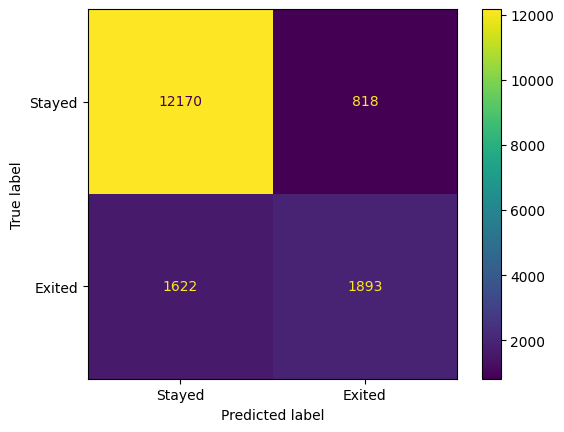

In [26]:
cm = confusion_matrix(y_val,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()